## Vorwort
Musik ist ein wichtiger Bestandteil unserer Kultur und der Identität eines jeden Menschens. Man ist in der heutigen Zeit fast ständig von Musik umgeben, man kann ihr kaum aus dem Weg gehen.

Dass Musik eine Gesellschaftlich so zentrale Rolle spielt hat mehrere Gründe. Sie fördert oder erzeugt ein Gemeinschaftsgefühl in einer Gruppe, durch gemeinsames Tanzen und musikalische Rituale. Gleichzeitig zeigt sie Zusammenhalt: man zeigt anderen Gruppierungen, wir halten zusammen, wir sind stark. Diese Eigenschaften wurden auch zum Beispiel in Ausnahmesituationen wie Kriegen genutzt um ein Nationalbewusstsein zu förden. Musik wird vor Allem genutzt um Gefühle auszudrücken. Ein berühmtes Beispiel, auch aus dem Musikunterricht... Smiley!, ist dabei der Blues, mit dem die schwarze Bevölkerung in den USA ihr Leid in der Sklaverei ausdrückte.

Spotify hat die Musikindustrie grundsätzlich verändert. Um 2010 polarisierten hauptsächlich illegale Streamingdienste oder illegale Youtube-Downloader im Internet. Dann kam Spotify und hat die Musikbranche in gewisser Weise gerettet. Diese hatten massive Probleme damit, illegales Streaming zu unterbinden. 2011 gabe es dann durch Spotify endlich einen legalen Streamingdienst, der auch kostenlos zur Verfügung steht und dabei trotzdem den Künstlern Provisionen zukommen lässt. In 2017 wurde durch Musiklabels dann zum ersten Mal mehr Geld mit Streaming als mit dem Verkauf von CDs verdient. Heutzutage hat Spotify unter den Anbietern von Musikstreamingdiensten einen Marktanteil von 38 %. Damit ist Spotify fast doppelt so groß wie sein nächster Konkurrent Apple Musik. Eigentlich jedes Musiklabel und alle großen und auch kleinen Musiker arbeiten mit Spotify zusammen. Damit bilden die Spotify Charts zusätzlich sehr gut die Beliebtheit von Musik ab.


## 1 Importierung benötigter Bibliotheken und des Datensatzes
In diesem Kapitel werden zuerst die benötigten Bibliotheken importiert. Danach wird der Basisdatensatz eingelesen, um mit der Bearbeitung zu beginnen.

### 1.1 Laden der Bibliotheken
Innerhalb des Datenexplorationsprojektes werden die folgenden Bibliotheken benötigt:

In [1]:
import os
import time
import random
import pandas as pd
import numpy as np
import seaborn as sns

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.utils import resample

from matplotlib import pyplot as plt

### 1.2 Laden des Basis-Datensatzes

In [2]:
base_data = pd.read_csv("song_data.csv")
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


Der Basisdatensatz besteht aus 18.835 Einträgen mit je 15 Attributen. Der Datensatz besitzt keine Lücken bzw. keine Null-Werte, sodass alle Zellen ausgefüllt sind. Von den 15 Attributen liegen neun als float64, fünf als int64 und eins als Object vor. Das "Object"-Attribut ist der Bezeichnung entsprechend der Name des Songs, die einzige Textzelle im Datensatz.

In [3]:
base_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


## 2 Übersicht und Interpretation der Datenwerte
In diesem Kapitel geht es darum, die grundlegenden Eigenschaften der Datenwerte und ihre zulässigen Wertebereiche zu ermitteln. Zunächst soll festgestellt werden, welchem Skalenniveau welcher Datenwert zugeordnet werden kann.

In [17]:
base_data.nunique().sort_values()

audio_mode              2
time_signature          5
key                    12
song_popularity       101
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
song_name           13070
dtype: int64

Über die Anzahl einzigartiger Werte eines Feldes ist ersichtlich, dass kategorische Werte audio_mode, time_signature und key, wobei audio_mode sogar binär ist, und alle weiteren Werte numerisch sind.

Nachfolgend sind die 20 beliebtesten Lieder dargestellt, um einen ersten Eindruck vom Datensatz zu bekommen. Hierbei ist erkennbar, dass innerhalb der 20 obersten Werte nur zwei Lieder vertreten sind, die mehrfach vorliegen. Der Umgang mit den Redundanzen wird genauer in Kapitel 2.1 aufgegriffen.

In [4]:
base_data.sort_values(by=["song_popularity"], ascending=False).head(20)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
7568,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
15091,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
17392,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
14176,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
11665,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
11697,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
5593,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
4299,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
16497,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
17590,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671


| Feldname | Datentyp / Wertebereich | Beschreibung |
| --- | --- | --- |
| song_name| String | Der Name des Liedes |
| song_popularity | int [0;100] | Die relative Beliebtheit eines Liedes in Prozent. Die Beliebtheit wird an der Gesamtzahl der Streams eines Liedes gemessen. Das Lied mit dem Wert 100 ist das beliebteste Lied. |
| song_duration | int [0;∞] | Gibt die Länge eines Liedes in Millisekunden an |
| acousticness | float [0;1] | Die Akustikt eines Liedes in Prozent. Ein Wert von 1.0 bedeutet, dass ein Lied sehr akustisch ist und nicht elektronisch verstärkt |
| danceability | float [0;1] | Die Tanzbarkeit eines Liedes in Prozent. Ein Wert von 1.0 bedeutet, dass dieses Lied zum Tanzen anregt. Der Wert wird über die musikalischen Elementen wie unteranderem dem Tempo, der Stabilität der Rhytmik, der Stärke des Bass's ermittelt. |
| energy | float [0;1] | Die Intensität und Aktivität des Liedes in Prozent, basierent auf der Schnelligkeit, Lautstärke und Rauschen des Liedes, sowie der generellen Entropie. Ein Wert von 1.0 bedeutet dass ein Lied sehr energetisch ist, wie zum Beispiel Death Metal. |
| instrumentalness | float [0;1] | Die Instrumentalität gibt an in wie weit Vocals im Lied vorhanden sind. Je näher der Wert an 1.0 liegt, desto wahrscheinlicher ist das Lied rein akustisch. Je näher sich der Wert an die 0 annähert, desto weniger Instrumente sind zu hören. So kann man auch Reden erkennen, da die hier einen Wert von 0 haben. |
| key | int [-1;11] | Die Tonart des Liedes. Der Wert nimmt eine -1 an wenn keine primäre Tonart erkannt wurde. (Siehe https://de.wikipedia.org/wiki/Tonklasse) |
| liveness | float [0;1] | Die Wahrscheinlichkeit dass das Lied eine Liveversion ist. Dies basiert auf Zuschauern/Zuhörern die im Hintergrund gehört werden. Ab 0.8 kann von einer Liveversion ausgegangen werden. |
| loudness | float [-38.0;1,5] | Die Loudness gibt die durchschnittliche Lautstärke des Liedes in Decibel an. Die Lautstärke ist relativ angegeben. |
| audio_mode | int [0;1] | Gibt die Modalität des Liedes wieder. Dabei steht 0 für Moll und 1 für Dur. |
| speechiness | int [0;1] | Gibt wieder ob exklusiv gesprochen wird, wie zum Beispiel bei Reden oder Gedichten (Racism And Injustice von Martin L. King). Bei allem >0.66, ist es sehr wahrscheinlich dass nur gesprochen wird, bei <0.33 gibt es kaum oder gar kein gesprochenes Wort. |
| tempo | float [0;∞] | Eine Schätzung der Geschwindigkeit des Liedes in Beats per Minute (BPM). |
| time_signature | int [3;7] | Die primäre Taktangabe des Liedes. Sie gibt Takte von 3/4 bis 7/4 an. |
| audio_valence | float [0;1] | Die positivität des Liedes. Dabei deutet ein hoher Wert auf eine positive (fröhlich, euphorisch), ein niedriger Wert auf eine negative Stimmung hin (aggresiv, melancholisch). |

In der Tabelle ist erkennbar, dass

### 2.1 Umgang mit fehlenden Werten, Redundanzen und Inkonsistenzen
Um zuverlässige Ergebnisse zu erzielen, ist es wichtig wie mit Redundanzen umgegangen wird, da sie die Performance von späteren Modellen maßgeblich beeinflussen können. Hierbei kann zwischen zwei Optionen entschieden werden: Einerseits könnten die Redundanzen im Datensatz behalten werden, wobei beim Splitten des Datensatzes in einen Trainings- und Testdatensatz es wichtig wäre, alle gleichen Einträge entweder vollständig in den Trainings- bzw. in den Testdatensatz aufzunehmen, sodass diese disjunkt bleiben und keine Memorisierung gefördert wird. Anderseits können die Redundanzen entfernt werden, mit der Folge, dass der Datensatz kleiner wird und nur eine Instanz übrig bleibt. Im Rahmen dieser Ausarbeitung werden doppelte Einträge entfernt, wenn sie den selben Liednamen und die gleiche Länge haben. 

In [19]:
cleared = base_data.drop_duplicates(subset = ["song_name", "song_duration_ms"], keep = "last").reset_index(drop = True)
cleared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14468 entries, 0 to 14467
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         14468 non-null  object 
 1   song_popularity   14468 non-null  int64  
 2   song_duration_ms  14468 non-null  int64  
 3   acousticness      14468 non-null  float64
 4   danceability      14468 non-null  float64
 5   energy            14468 non-null  float64
 6   instrumentalness  14468 non-null  float64
 7   key               14468 non-null  int64  
 8   liveness          14468 non-null  float64
 9   loudness          14468 non-null  float64
 10  audio_mode        14468 non-null  int64  
 11  speechiness       14468 non-null  float64
 12  tempo             14468 non-null  float64
 13  time_signature    14468 non-null  int64  
 14  audio_valence     14468 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 1.7+ MB


Da Redundanzen vorhanden sind werden diese anhand gleichem Songtitel und gleicher Songlänge entfernt. Dadurch landen wir bei 14.468 Songs, was bedeutet dass somit circa 4.400 Redundanzen entfernt wurden.

In [20]:
cleared.sort_values(by=["song_popularity"], ascending=False).head(20)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
13326,Happier,100,214289,0.19100,0.687,0.792,0.000000,5,0.1670,-2.749,1,0.0452,100.015,4,0.671
13346,I Love It (& Lil Pump),99,127946,0.01140,0.901,0.522,0.000000,2,0.2590,-8.304,1,0.3300,104.053,4,0.329
13490,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",98,212500,0.15300,0.841,0.798,0.000003,1,0.0618,-4.206,0,0.2290,95.948,4,0.591
13592,Promises (with Sam Smith),98,213309,0.01190,0.781,0.768,0.000005,11,0.3250,-5.991,1,0.0394,123.070,4,0.486
13308,In My Feelings,98,217925,0.05890,0.835,0.626,0.000060,1,0.3960,-5.833,1,0.1250,91.030,4,0.350
13472,Eastside (with Halsey & Khalid),98,173799,0.55500,0.560,0.680,0.000000,6,0.1160,-7.648,0,0.3210,89.391,4,0.319
13290,Lucid Dreams,97,239835,0.34900,0.511,0.566,0.000000,6,0.3400,-7.230,0,0.2000,83.903,4,0.218
11606,In My Mind,97,184560,0.17600,0.694,0.770,0.000011,6,0.1180,-5.335,1,0.1490,125.905,4,0.163
13319,Falling Down,97,196400,0.01750,0.669,0.574,0.002940,4,0.1460,-6.442,0,0.0286,120.013,4,0.273
13469,SICKO MODE,97,312820,0.00513,0.834,0.730,0.000000,8,0.1240,-3.714,1,0.2220,155.008,4,0.446


Zur Gegenprobe kann die Anzahl einzigartiger Liednamen ermittelt werden.

In [21]:
cleared["song_name"].value_counts()

Heaven                      8
Fire                        8
You                         7
Fall                        7
Stay                        7
                           ..
Hallelujah I Love Her So    1
Punches (with LP)           1
Vibrate                     1
3's & 7's                   1
Est                         1
Name: song_name, Length: 13070, dtype: int64

Es ist erkennbar, dass weiterhin Lieder mit dem selben Titel mehrfach vorhanden sind. Jedoch ist es fraglich, ob sie vom selben Künstler stammen oder ob es auch die selbe Version eines Liedes ist, weil sie eine unterschiedliche Länge haben. Auffällig ist auch, dass sich unter den mehrfachvorkommenden Songtiteln vorallem generische Wörte wie "Heaven", "Fire", "Fall", "Gone" oder "Stay" befinden, was ein Indiz dafür sein kann, dass diese Lieder von unterschiedlichen Künstlern kommen könnten. Da es keine konkreten Anhaltspunkte gibt, werden keine weiteren Einträge entfernt.

### 2.2 Erweiterung des Datensatzes
Zur Erweiterung des Basis-Datensatzes wird die Spotify Web API (https://developer.spotify.com/documentation/web-api/) verwendet. Dazu werden eine Client-ID und ein Client-Secret benötigt, die im Rahmen von ... erstellt werden können. 

In [22]:
CLIENT_ID = "28f2619d8a6242ceae8160c565174771"
CLIENT_SECRET = "5f6cb53e2614428380966f0e93e72c16"

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET))

expanded = cleared.copy()

def expand_row(row):
    time.sleep(0.1) # Sleep 100ms (=600 requests per min)
    results = sp.search(q=row.song_name, limit=50, type="track")

    for _, track in enumerate(results["tracks"]["items"]):
        if track["duration_ms"] == row.song_duration_ms:
            row["artist"] = track["artists"][0]["name"]
            row["explicit"] = track["explicit"]
            return row
    return row

expanded = expanded.apply(expand_row, axis=1)

Ausführung der Zelle hat circa 79 Minuten gedauert. Im Verlauf davon wurden 14.468 Anfragen an Spotify gesendet. Insgesamt wurden in vorherigen Tests circa 20.000 Anfragen an Spotify gesendet.

In [46]:
expanded.info()
expanded.to_csv("song_data_expanded.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14468 entries, 0 to 14467
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        14468 non-null  int64  
 1   acousticness      14468 non-null  float64
 2   artist            10503 non-null  object 
 3   audio_mode        14468 non-null  int64  
 4   audio_valence     14468 non-null  float64
 5   danceability      14468 non-null  float64
 6   energy            14468 non-null  float64
 7   explicit          10503 non-null  object 
 8   instrumentalness  14468 non-null  float64
 9   key               14468 non-null  int64  
 10  liveness          14468 non-null  float64
 11  loudness          14468 non-null  float64
 12  song_duration_ms  14468 non-null  int64  
 13  song_name         14468 non-null  object 
 14  song_popularity   14468 non-null  int64  
 15  speechiness       14468 non-null  float64
 16  tempo             14468 non-null  float6

Leider können bei circa 3900 Zeilen nicht zweifelsfrei Artist bzw. Explizit-Status ermittelt werden. Würde man jeweils auf das erste Ergebnis zurückgreifen, wenn mit gleicher Songlänge kein Lied gefunden würde, könnten alle Zeilen gefüllt werden. Aber es ist fraglich, ob das jeweilige Ergebnis richtig ist. Daher haben wir davon abgesehen und nur die zweifelsfei zugeordneten Lieder betrachtet.

Die durch die Spotify-API erweiterten Daten wurden als eigene csv gecachet um weitere Anfragen zu vermeiden. Die CSV enthält sowohl die bereinigten Daten als auch die Erweiterten.

In [2]:
cleared = pd.read_csv("song_data_expanded.csv")

## 3 Visualisierung und Korrelationen zwischen den Features


Zum Verständnis und der besseren Vorbereitung auf die Modellwahl, ist eine genaue Betrachtung der einzelnen Datenreihen sowie der Korrelationen zwischen ebendiesen unabdingbar.
Erste Gedanken unsererseits drehen sich dabei um die Künstler. Ob es mehr One-Hit-Wonder oder konsistent beliebte Künstler gibt.

In [5]:
plt.rcParams["axes.axisbelow"] = True

### 3.1 Popularität eines Liedes

<AxesSubplot:>

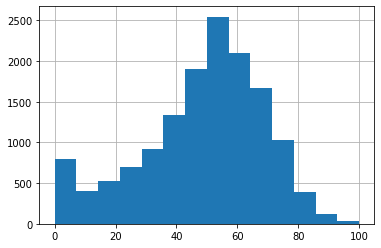

In [6]:
cleared["song_popularity"].hist(bins=14)

Die Popularität eines Liedes ist mit Ausnahe des Intervalls [0;10] normalverteilt. Wir können daher hier von einer annähernd Normalverteilten Datenmenge reden.
Was in diesem Diagramm gleich hervorsticht ist die Menge an sehr unbeliebten Songs. Ganz im Gegensatz zu den beliebtesten Songs, welche eine sehr geringe Menge aller Songs ausmachen.
Dies könnte also ein Problem beim Training und der Testung der Modelle werden, da die Menge an populären Songs vielleicht einfach zu gering sein könnte um valide Ergebnisse zu erzielen.

In [7]:
cleared["song_popularity"].describe()

count    14468.000000
mean        48.593655
std         20.282872
min          0.000000
25%         37.000000
50%         52.000000
75%         63.000000
max        100.000000
Name: song_popularity, dtype: float64

### 3.2 Länge eines Liedes

count    1.446800e+04
mean     2.189403e+05
std      6.287834e+04
min      1.200000e+04
25%      1.836518e+05
50%      2.117835e+05
75%      2.448130e+05
max      1.799346e+06
Name: song_duration_ms, dtype: float64
median: 211783.5


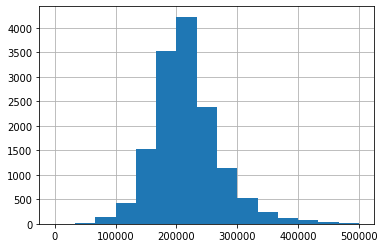

In [7]:
cleared["song_duration_ms"].hist(range=[0, 500000], bins=15)

print(cleared["song_duration_ms"].describe())
print("median:", cleared["song_duration_ms"].median())

Die Länge der Lieder ist normalverteilt, zeichnet sich aber auch durch Ausreißer auf der rechten Seite aus.
Das arithmetische Mittel liegt bei X, der Median bei Y. Die Abweichung zwischen diesen beiden Maßen ist durch Ausreißer bedingt, wobei der Median robuster gegenüber Ausreißern ist.

<AxesSubplot:>

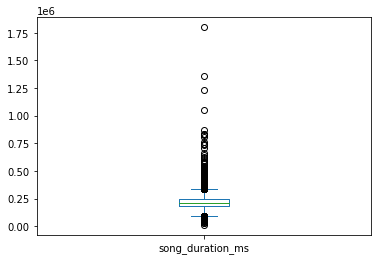

In [8]:
cleared["song_duration_ms"].plot.box()

Der Boxplot stellt dar, wie deutliche Ausreißer besonders nach oben hin auftreten. Dies ist eventuell ein Indikator dafür, welches Intervall betrachtet werden sollte - gerade wenn Filtering nötig wird, um bessere Ergebnisse zu erzielen.

### 3.3 Musikalische Eigenschaften (numerisch) eines Liedes

<AxesSubplot:>

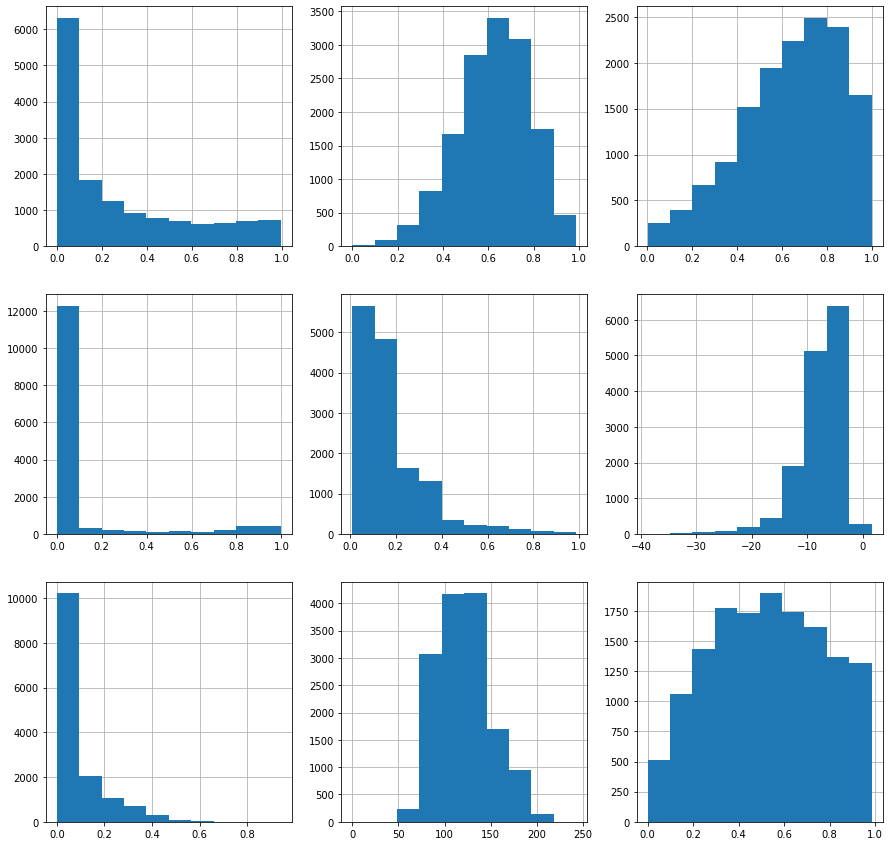

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_figheight(15)
fig.set_figwidth(15)

cleared["acousticness"].hist(ax=axes[0,0])
cleared["danceability"].hist(ax=axes[0,1])
cleared["energy"].hist(ax=axes[0,2])

cleared["instrumentalness"].hist(ax=axes[1,0])
cleared["liveness"].hist(ax=axes[1,1])
cleared["loudness"].hist(ax=axes[1,2])

cleared["speechiness"].hist(ax=axes[2,0])
cleared["tempo"].hist(ax=axes[2,1])
cleared["audio_valence"].hist(ax=axes[2,2])

Hier zuerst ein Überblick über die einzelnen Liedeigenschaften.

#### 3.3.1 Acousticness

<AxesSubplot:>

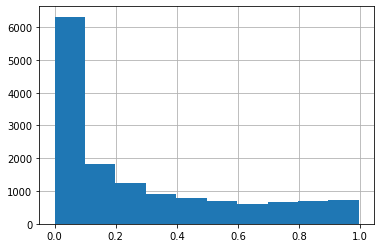

In [10]:
cleared["acousticness"].hist()

Die Akustik der Lieder ist mit Ausnahme des Intervalls [0.0;0.1] nahezu gleichverteilt. Das bedeutet die meisten Lieder sind sehr stark elektronisch verstärkt bzw. ganz elektronisch produziert.
Die restlichen Lieder verteilen sich hingegen sehr gut zwischen "fast aussschließlich elektronisch" verstärkt und "rein akustisch".
Die Akustik liegt im Durchschnitt bei ca. 0.27, was natürlich auf das Intervall [0.0;0.1] zurückzuführen ist. Die Standardabweichung liegt hier bei ca. 0.3.

In [12]:
cleared["acousticness"].describe()

count    14468.000000
mean         0.273181
std          0.299414
min          0.000001
25%          0.024300
50%          0.142000
75%          0.466000
max          0.996000
Name: acousticness, dtype: float64

#### 3.3.2 Danceability

<AxesSubplot:>

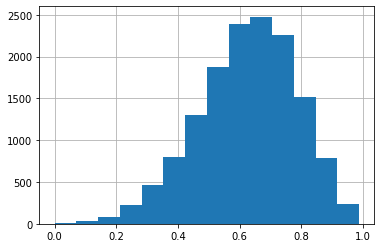

In [11]:
cleared["danceability"].hist(bins=14)

Die Danceability scheint laut dem Diagramm Normalverteilt. Hier liegt der Durchschnitt bei ca. 0.62 und die Standardabweichung liegt bei ca. 0.16.
Allgemein lässt sich also sagen dass die Mehrheit der Songs zum Tanzen geeignet sind.

In [14]:
cleared["danceability"].describe()

count    14468.000000
mean         0.624570
std          0.158247
min          0.000000
25%          0.524000
50%          0.636000
75%          0.740000
max          0.987000
Name: danceability, dtype: float64

#### 3.3.3 Energy

<AxesSubplot:>

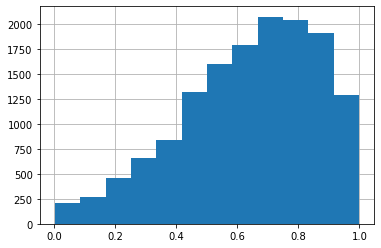

In [12]:
cleared["energy"].hist(bins=12)

Die Energie der Songs steigt bis zum Intervall [0.7;0.8] annäherd linear an. Der Durchschnitt liegt bei ca. 0.64 und die Standardabweichung bei ca. 0.22.
Generell lässt sich sagen dass eine Mehrzahl der Songs sehr sehr energetisch ist, jedoch deutlich weniger Songs extrem energetisch. Der Anteil an sehr ruhigen Songs hält sich auch eher in Grenzen.

In [16]:
cleared["energy"].describe()

count    14468.000000
mean         0.638505
std          0.222621
min          0.001070
25%          0.494000
50%          0.671000
75%          0.817000
max          0.999000
Name: energy, dtype: float64

#### 3.3.4 Instrumentalness

<AxesSubplot:>

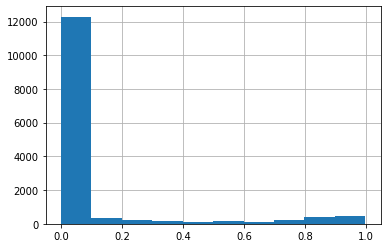

In [13]:
cleared["instrumentalness"].hist()

Der Großteil der Werte liegt in dem Intervall [0;0.1]. Das heißt, dass die meisten Songs vocals haben, d.h.: sie haben sowohl Musik als auch Text.
Dieses Intervall haben wir uns dann nochmal genauer angeschaut und festgestellt, dass auch diese, leicht gezoomte Grafik, fast die gleichen Eigenschaften aufweißt.
Der Durchschnitt dieser Eingenschaft liegt bei ca. 0.09, die Standardabweichung liegt bei ca. 0.24.

0.000000    5057
0.001050      13
0.000001      13
0.001030      12
0.000105      11
            ... 
0.009620       1
0.702000       1
0.737000       1
0.272000       1
0.000057       1
Name: instrumentalness, Length: 3903, dtype: int64

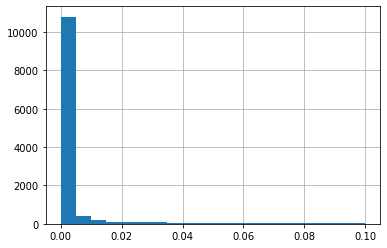

In [14]:
cleared["instrumentalness"].hist(range=[0, 0.1], bins=20)
cleared["instrumentalness"].value_counts()

In [19]:
cleared["instrumentalness"].describe()

count    14468.000000
mean         0.093888
std          0.242796
min          0.000000
25%          0.000000
50%          0.000022
75%          0.005482
max          0.997000
Name: instrumentalness, dtype: float64

#### 3.3.5 Liveness

<AxesSubplot:>

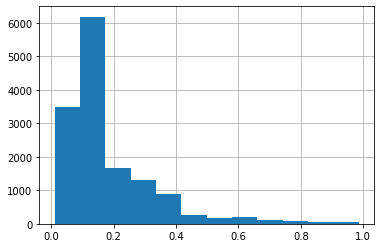

In [15]:
cleared["liveness"].hist(bins=12)

Die meisten der Songs scheinen laut der Grafik nicht Liveaufnahmen zu sein. Allerdings sieht man, das sich viele Songs nicht ganz links bei den reinen Studioaufnahmen befinden, sondern Spotify bei diesen automatisch gewisse Hintergrundgeräusche erkennt und sie somit weiter in Richtung Liveaufnahmen verschiebt.
Die Songs liegen somit auch im Durchschnitt bei ca. 0.18, wobei die Standardabweichung bei ca. 0.15 liegt.

In [21]:
cleared["liveness"].describe()

count    14468.000000
mean         0.180578
std          0.145397
min          0.010900
25%          0.093100
50%          0.121000
75%          0.224000
max          0.986000
Name: liveness, dtype: float64

#### 3.3.6 Loudness

<AxesSubplot:>

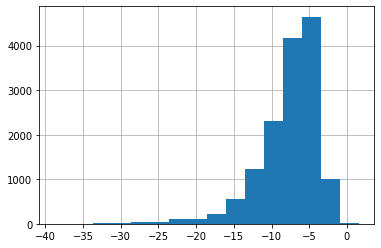

In [16]:
cleared["loudness"].hist(bins=16)

Da die optimale Dezibelzahl für gemasterte Songs bei maximal -3 Dezibel liegt, zeigt diese Songeigenschaft eine sehr gute Masterung der Songs im Datensatz. Alles Richtung 0 db geht in die Richtung der Übersteuerung, alles unter ca. -8 db zwingt dich dazu, die Lautstärke am Ausgabegerät sehr stark verändern zu müssen.
Der Durchschnitt liegt knapp über den -8 db, bei ca. -7.72 db, die Standardabweichung bei ca. 4.05.

In [23]:
cleared["loudness"].describe()

count    14468.000000
mean        -7.718469
std          4.046014
min        -38.768000
25%         -9.439250
50%         -6.787500
75%         -5.017750
max          1.585000
Name: loudness, dtype: float64

#### 3.3.7 Speechiness

<AxesSubplot:>

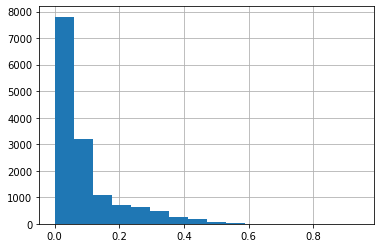

In [17]:
cleared["speechiness"].hist(bins=16)

Hier zeigt sich auch sehr schön, wie weiter oben bei der "instrumentalness", dass der Großteil der Songs Text beinhaltet. Der Anteil der Lieder ohne Text ist verschwindent gering.
Der Durchschnitt ist wie erwartet bei ca. 0.1, die Standardabweichtung liegt hier ebenfalls bei ca. 0.1.

In [25]:
cleared["speechiness"].describe()

count    14468.000000
mean         0.099633
std          0.103932
min          0.000000
25%          0.037200
50%          0.054100
75%          0.113000
max          0.941000
Name: speechiness, dtype: float64

#### 3.3.8 Tempo

<AxesSubplot:>

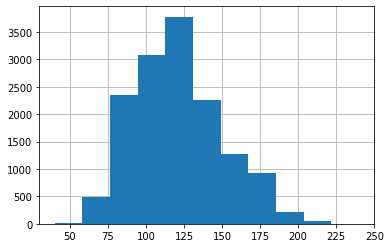

In [18]:
cleared["tempo"].hist(range=[40, 240], bins=11)

Die meisten Hip-Hop-Songs liegen zwischen 88 und 121 BPM, House-Songs liegen meist bei ca. 125 BPM. Hier liegt wieder eine annähernde Normalverteilung rund um die 125 BPM vor, was den allgemeinen Schnitt wiederspiegelt.
Der Durchschnitt liegt somit bei ca. 121.19, die Standardabweichung liegt bei ca. 29.08.

In [27]:
cleared["tempo"].describe()

count    14468.000000
mean       121.191691
std         29.079174
min          0.000000
25%         98.227250
50%        120.023500
75%        139.956000
max        242.318000
Name: tempo, dtype: float64

#### 3.3.9 Audio Valence

<AxesSubplot:>

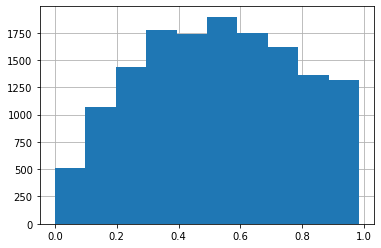

In [19]:
cleared["audio_valence"].hist()

Diese Eigenschaft ist relativ gleichverteilt, wobei die niedrigen Werte aus der Reihe tanzen. Dabei handelt es sich um die negativeren Songs und Titel. Der größere Teil der Lieder geht doch in die positive Richtung. D.h.: es gibt wohl doch mehr "Gute-Laune-Musik"... Smiley!
Hier liegt der Mittelwert bei ca. 0.53, die Standardabweichung bei ca. 0.25.

In [29]:
cleared["audio_valence"].describe()

count    14468.000000
mean         0.527793
std          0.248473
min          0.000000
25%          0.332000
50%          0.528000
75%          0.730000
max          0.984000
Name: audio_valence, dtype: float64

## 3.4 Musikalische Eigenschaften (kategorisch) eines Liedes

### 3.4.1 key (Tonart)

([<matplotlib.axis.XTick at 0x222502a8340>,
 [Text(0, 0, 'C'),
  Text(1, 0, 'C#'),
  Text(2, 0, 'D'),
  Text(3, 0, 'D#'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'F#'),
  Text(7, 0, 'G'),
  Text(8, 0, 'G#'),
  Text(9, 0, 'A'),
  Text(10, 0, 'A#'),
  Text(11, 0, 'B')])

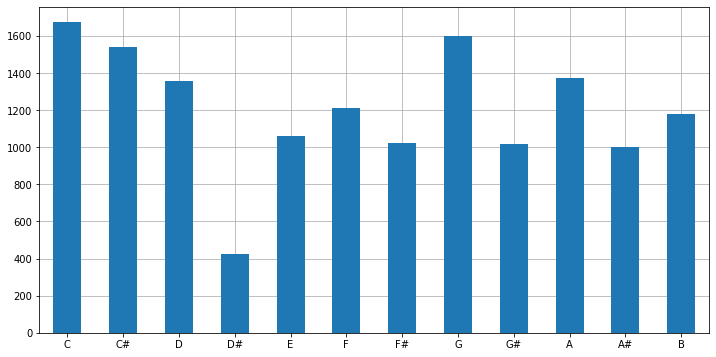

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))
cleared["key"].value_counts().sort_index().plot.bar()

plt.grid()
plt.xticks(range(0, 12), labels=["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"], rotation=0)

Hier ist die Menge aller Tonarten der Songs im Datensatz aufgeführt. Auffallend ist hier vor allem die Tonart "D#" auch "dis", welche generell sehr selten verwendet wird. Im Gegensatz dazu die Standardtonart "C" sowie "G", welche sehr sehr häufig mit der Modalität Dur gebraucht werden.
Die Tonart "D#" wurde hier nur 427 mal verwendet während die Tonarten "C" sowie "G" 1674 bzw. 1601 mal vorkommen.

In [31]:
cleared["key"].value_counts()

0     1674
7     1601
1     1540
9     1373
2     1359
5     1214
11    1180
4     1058
6     1024
8     1017
10    1001
3      427
Name: key, dtype: int64

### 3.4.2 audio_mode (Modalität der Tonleiter)

([<matplotlib.axis.XTick at 0x22250333a60>,
 [Text(0, 0, 'Moll'), Text(1, 0, 'Dur')])

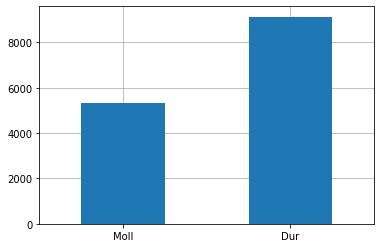

In [21]:
cleared["audio_mode"].value_counts().sort_index().plot.bar()
plt.grid()
plt.xticks([0, 1], labels=["Moll", "Dur"], rotation=0)

Die Modalität eines Liedes spiegelt meist auch die Stimmung des Liedes wieder. "Dur" klingt dabei positiver, während "Moll" eher negativer, gedämpfter rüber kommt.
Somit ist es nach der Betrachtung der "audio_valence" weiter oben nicht verwunderlich dass tendenziell mehr Songs in die positive Richtung gehen, also die Modalität "Dur" haben.

### 3.4.3 time_signature (Taktangabe)

Taktangabe (int 3-7), gibt Takt von 3/4 Takt bis 7/4 Takt an

([<matplotlib.axis.XTick at 0x222503a2860>,
 [Text(0, 0, '7/4'),
  Text(1, 0, '6/4'),
  Text(2, 0, '5/4'),
  Text(3, 0, '4/4'),
  Text(4, 0, '3/4')])

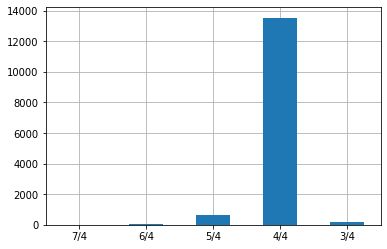

In [22]:
cleared["time_signature"].value_counts().sort_index().plot.bar()
plt.grid()
plt.xticks(range(0, 5), labels=["7/4", "6/4", "5/4", "4/4", "3/4"], rotation=0)

Der mit enormem Abstand meist verwendete Takt in jedem Genre der Musik ist der 4/4 Takt (gesprochen: vier-viertel-Takt). Er ist der unkomplizierteste Takt um mit den verschiedensten Notenwerten umzugehen, da diese ja von 1 ausgehen. Identische Taktangaben wären also 2/2 oder 8/8, die aber lediglich verwendet werden wenn der Interpret oder Komponist darauf besteht.
Während in der Klassik auch häufiger auf den 3/4 Takt zurückgegriffen wird, ist im Pop, Rock, Hip-Hop, etc. der 5/4 Takt vorherrschend vor dem 3/4 Takt.

In [35]:
cleared["time_signature"].describe()

count    14468.000000
mean         3.953000
std          0.316593
min          0.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: time_signature, dtype: float64

## 3.5 Korrelationen zwischen den Datenwerten

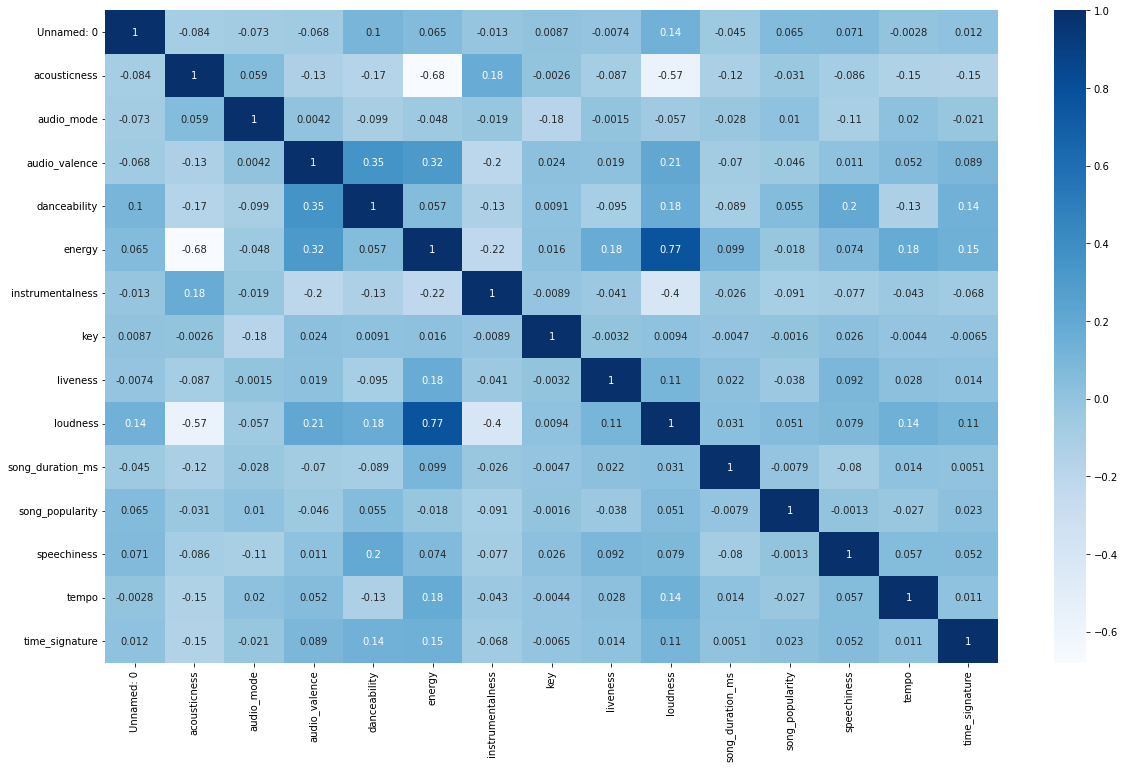

In [23]:
matrix = cleared.corr()
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(matrix, annot=True, cmap=plt.cm.Blues)
plt.show()

Vor dem Modelltraining war es noch wichtig zu schauen welche Eigenschaften denn überhaupt mit der Zielvariable "song_popularity" korrelieren. Dabei ist festzustellen, dass keine der Liedeigenschaften in einer relevanten Stärke mit der Zielvariable korreliert.
Teilweise gibt es aber sogar sehr starke Korrelationen zwischen den Eigenschaften an sich.
Die stärkste positive Korellation ist mit 0.77 zwischen "loudness" und "energy", was auch Sinn ergibt, da die Lautstärke bei energetischen Liedern meist sehr hoch ist. Die "loudness" korreliert auch relativ stark mit der "audio_valence".
Die stärksten negativen Korrelationen sind jeweils "loudness" und "energy" mit der "acousticness", ebenfalls Sinnvoll, da die meisten Lieder mit rein akustischen Instrumenten weder sehr laut noch sehr energetisch sind.

### 3.6 Deskriptive Analyse des erweiterten Datensatzes

In [25]:
explicit = cleared.groupby("explicit")
explicit.count().head()

,Unnamed: 0,acousticness,artist,audio_mode,audio_valence,danceability,energy,instrumentalness,key,liveness,loudness,song_duration_ms,song_name,song_popularity,speechiness,tempo,time_signature
explicit,,,,,,,,,,,,,,,,,
False,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404
True,2099,2099,2099,2099,2099,2099,2099,2099,2099,2099,2099,2099,2099,2099,2099,2099,2099


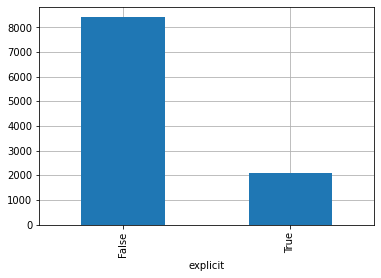

In [28]:
explicit.count()["Unnamed: 0"].plot.bar()
plt.grid()

Der Datensatz wurde in Kapitel 2.2 mit Hilfe der Spotify-API um die Künstler und den Explizit-Status erweitert. Leider konnten nur für 10.503 der 14.468 Lieder im Datensatz Explizit-Status sowie Künstler gefunden werden.Von diesen insgesamt 10.503 Liedern sind, mit einer Anzahl von 8404 Liedern, mehr als 80% als nicht Explizit gekennzeichnet. Mit 2099 Liedern ist die Anzahl an Songs mit Explizit-Status sehr gering.Dies lässt sich damit erklären, dass die beliebtesten Lieder meist auch im Radio gespielt werden müssen um so viel Aufmerksamkeit zu bekommen. Lieder mit Explizit-Status werden, wenn überhaupt, nur bei bestimmten Aktionen oder dem Wunsch eines Hörers im Radio gespielt. Außer der Künstler veröffentlicht eine zweite Version, in welcher die Schimpfwörter ersetzt oder weggeschnitten wurden. Dennoch sind solche Songs generell auch altersbeschränkt auf Plattformen wie Youtube und haben es so meist schwerer eine ähnliche Popularität zu erreichen, wie es für "normale" Lieder möglich ist.

In [18]:
explicit["song_popularity"].describe().head()

,count,mean,std,min,25%,50%,75%,max
explicit,,,,,,,,
False,8404.0,50.524988,18.812325,0.0,40.0,53.0,64.0,100.0
True,2099.0,55.801810,19.874674,0.0,46.0,59.0,70.0,99.0


Bei einer genaueren Betrachtung der Verteilung der Lieder mit und ohne Explizit-Status im Bezug zur "song_popularity" fällt aber auf dass die Lieder mit Explizit-Status laut des Mittelwertes von ca. 55.8 etwas beliebter sind als die Anderen, mit einem Mittwelwert von ca. 50.52. Anhand der prozentualen Verteilung in den Quantilen lässt sich aber schön sehen, dass während Songs mit Explizit-Status im obersten Quantil mit ca. 29% vertreten sind, der prozentuale Anteil der "normalen" Songs mit ca. 39% in diesem Quantil doch deutlich höher ist.

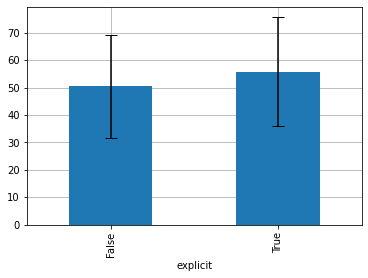

In [29]:
explicit_song_popularity = explicit["song_popularity"]
explicit_song_popularity.mean().plot(kind="bar", yerr=explicit_song_popularity.std(), capsize=6)
plt.grid()

In [37]:
top100 = cleared[["song_popularity", "explicit"]].sort_values(by=["song_popularity"], ascending=False).head(107)
top100.count()
top100["explicit"].value_counts()

True     51
False    49
Name: explicit, dtype: int64

Auch die Top 100 der beliebtesten Titel im Datensatz überrascht wieder, mit 51 sind tatsächlich 2 Lieder mehr mit dem Explizit-Status versehen als ohne. Nach diesen Erkenntnissen ist davon auszugehen, dass die "song_popularity" nur auf die Beliebtheit der Titel bei Spotify zurückgreift und sonstige Einflüsse wie das Radio, wenn überhaupt, nur eine Nebenrolle spielen.

#### Künstler

In [14]:
artists = cleared.groupby("artist")
artists["song_name"].count().sort_values(ascending=False).head(10)

artist
Lady Gaga      40
Kanye West     38
Drake          31
Gucci Mane     21
Eminem         20
Ed Sheeran     19
Khalid         19
The Beatles    19
Future         17
The Weeknd     17
Name: song_name, dtype: int64

Bei der Betrachtung der Künstler fällt auf, dass nur 3 Künstler, nämlich Lady Gaga, Kanye West und Drake, mit mehr als 30 Titeln im Datensatz vertreten sind. Bei diesen Künstlern ist dies durchaus gerechtfertigt, da sie schon sehr viele Titel veröffentlicht haben, es zeigt aber auch eine unfaire Verteilung wenn Künstler wie die Beatles nur mit 19 Titeln im Datensatz vertreten sind. Generell sind aber mehr Musiker der 2000er und 2010er Jahre im Datensatz vertreten, was die These, dass der Datensatz von 2018 ist, weiter stützt.

In [39]:
artists["song_popularity", "song_name"].agg({"song_name":"size", "song_popularity":"mean"}) \
    .sort_values(by="song_popularity", ascending=False).head(10)

<ipython-input-39-318b7715cf18>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  artists["song_popularity", "song_name"].agg({"song_name":"size", "song_popularity":"mean"}).sort_values(by="song_popularity", ascending=False).head(10)


,song_name,song_popularity
artist,,
Dynoro,1,97.0
Nio Garcia,1,94.0
XXXTENTACION,5,90.8
Brytiago,1,90.0
Dennis Lloyd,1,90.0
Cassa Jackson,1,90.0
Alex Rose,1,89.0
BlocBoy JB,1,89.0
Kris Kross Amsterdam,1,89.0


Nun war es für uns interessant zu sehen, ob es Künstlern gelungen ist mit vielen verschiedenen Titeln eine gleichmäßig hohe Beliebtheit zu erreichen oder die größte Durchschnittliche Beliebtheit nur von One-Hit-Wundern erreicht wurde. Hier gab es eine Überraschung in der Form des Künstlers XXXTentacion, welcher es trotz 5 Titeln im Datensatz geschafft hat, eine durchschnittliche "song_popularity" von über 90 zu haben. Dies gelingt keinem Anderen in diesem Ausmaß.

In [115]:
artists["song_popularity", "song_name"].agg({"song_name":"size", "song_popularity":"max"}) \
    .sort_values(by="song_popularity", ascending=False).head(10)

<ipython-input-115-c24b59aa09e1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  artists["song_popularity", "song_name"].agg({"song_name":"size", "song_popularity":"max"}) \


,song_name,song_popularity
artist,,
Marshmello,10,100
Kanye West,38,99
benny blanco,2,98
Drake,31,98
Calvin Harris,14,98
DJ Snake,10,98
Lil Peep,9,97
Juice WRLD,4,97
Travis Scott,11,97


Hier war es nun, anschließend zur vorigen Untersuchung zu der durchschnittlichen Beliebtheit, interessant zu sehen, ob die Künstler mit der tatsächlich höchsten "song_popularity" nur einen Hit gelandet haben, oder auch mehrere Songs veröffentlicht haben. Mit Außnahme von Dynoro und benny blanco haben alle Künstler, deren Titel die beliebtesten des Datensatzes sind mindestens 4 Titel im Datensatz. Marshmello, mit dem beliebtesten Titel des gesamten Datensatzes hat noch 9 andere Titel im Datensatz, Kanye West mit dem zweitbeliebtesten Titel sogar noch 37 andere. Anhand dessen lässt sich viel besser sehen, dass die meisten Künstler mit einem beliebten Titel auch deutlich mehr Titel veröffentlich haben.

In [40]:
artists["song_popularity", "song_name"].agg({"song_name":"size", "song_popularity":"sum"}) \
    .sort_values(by="song_popularity", ascending=False).head(10)

<ipython-input-40-66ed74aed6cc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  artists["song_popularity", "song_name"].agg({"song_name":"size", "song_popularity":"sum"}) \


,song_name,song_popularity
artist,,
Kanye West,38,2464
Drake,31,1931
Lady Gaga,40,1873
Ed Sheeran,19,1472
Eminem,20,1321
Gucci Mane,21,1224
The Weeknd,17,1204
Lil Wayne,15,1136
Khalid,19,1132


Dann haben wir uns noch die kumulierten Beliebtheiten der Künstler im Datensatz angeschaut, was wieder für neue Erkenntnisse gesorgt hat. Zum einen hat Kanye West mit 38 Titeln kumuliert die meiste Beliebtheit, zum anderen schafft es Drake mit 31 Titeln auf Platz 2, vor Lady Gaga mit 40 Titeln. Diese ist dann auf Platz 3, dicht gefolgt von Ed Sheeran auf Platz 4, mit weniger als der Hälfte der Titel, was für eine durchschnittlich deutlich höhere Beliebtheit der einzelnen Titel spricht.

In [27]:
artists["song_popularity", "song_name"] \
    .agg({"song_name":"size", "song_popularity":[np.mean, np.max]}) \
    .sort_values(by=("song_popularity", "amax"), ascending=False).head(100).mean()

<ipython-input-27-b8eb99767d2c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  artists["song_popularity", "song_name"] \


song_name        size     7.590000
song_popularity  mean    72.076428
                 amax    90.710000
dtype: float64

Zum Schluss haben wir hier die durchschnittliche Titelanzahl der Top 100 Künstler (nach ihren beliebtesten Titeln) mit ihrer durchschnittlichen "song_popularity" und der durchschnittlichen Beliebtheit der jeweils beliebtesten Songs aller Künstler aus den Top 100. In den Top 100 haben die Künstler im Durchschnitt ca. 8 Titel, eine Beliebtheit im Mittel von ca. 72.08 über alle Songs und eine Beliebtheit im Mittel von ca. 90.71 über die jeweils beliebtesten Songs.

In [28]:
artists["song_popularity", "song_name"] \
    .agg({"song_name":"size", "song_popularity":[np.mean, np.max]}) \
    .sort_values(by=("song_popularity", "amax"), ascending=False).head(500).mean()

<ipython-input-28-24525b998a97>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  artists["song_popularity", "song_name"] \


song_name        size     4.590000
song_popularity  mean    68.768154
                 amax    81.320000
dtype: float64

Zum Vergleich zu den Top 100 haben wir noch die Top 500 betrachtet. Hier haben die Künstler im Durchschnitt ca. 5 Titel, eine Beliebtheit im Mittel von ca. 68.77 über alle Songs und eine Beliebtheit im Mittel von ca. 81.32 über die jeweils beliebtesten Songs. Es lässt sich also logischweise erkennen, dass die durchschnittliche Beliebtheit sowohl aller Titel als auch der jeweils beliebtesten Titel abnimmt. Ebenso wie die durchschnittliche Gesamtanzahl an Titeln eines Künstlers.

## 4 Datentransformation und Preprocessing

Die Datenaufbereitung ist ein entscheidender Schritt für Data Analytics und Machine Learning, wobei sich die Art der Aufbereitung unterscheidet, je nachdem ob die Daten innerhalb von Data Analytics ausgewertet werden sollen oder über Machine Learning Modelle auf ihnen trainiert werden sollen (vgl. Jafari 2020, Kap. 3). Durch die Aufbereitung der Daten kann neben einer verbesserten Performance auch schnellere Berechnungen der Modelle erreicht werden (vgl. Bishop 2016, S. 2f.). Im folgenden werden verschiedene Ansätze verwendet, um die Daten in ein möglichst passendes Format für die Algorithmen zum Machine Learning zu überführen.

### 4.1 Auswahl der Features
Das hier vorliegende Supervised Learning zeichnet sich dadurch aus, dass sowohl der Eingangsvektor $X$ als auch der Zielvektor $y$ von Anfang an bekannt sind (vgl. Bishop 2016, S. 3). Konkret setzt sich der Eingangsvektoren aus allen numerischen bzw. kategorischen Features des Basisdatensatzes zusammen, im nachfolgenden Sourcecode als 
$X$ bezeichnet, mit Ausnahme der Song-Popularitätswerte, die den Zielvektor bilden und als $y$ bezeichnet werden. Als abhängige Variable soll die Popularität eines Songs durch die Modelle angenährt werden. Die Features "Artist" und "Explicit", die über die Erweiterung in Kapitel 2.2 in den Datensatz aufgenommen wurden, werden hierbei nicht betrachtet, da sie nicht für jeden Eintrag gefunden werden konnten. Durch die daraus entstehenden Null-Werte müssten die entsprechenden Einträge entfernt werden, sodass der Datensatz um fast 30% reduziert worden wäre.

In [30]:
X = cleared[["song_duration_ms", "acousticness", "danceability", "energy", "instrumentalness", "key", "liveness", "loudness", "audio_mode", "speechiness", "tempo", "time_signature", "audio_valence"]]
y = cleared["song_popularity"]

Bei der Auswahl der Features ist es wichtig, über Feature Engineering eine Selektion so zu treffen, dass nur für das Machine Learning nützliche Features verwendet werden (vgl. Géron 2019, S. 27). Beim Tainieren der Modelle kam es zu keinen positiven Effekten, wenn Features aus $X$ heraus gelassen wurden. Dadurch wird $X$ nachfolgend mit dieser Kombination an Features beibehalten.

### 4.2 Trainings- und Testdatensatz Split
Um die Performance der einzelnen Modelle zu messen, wird der Datensatz in zwei disjunkte Teildatensätze unterteilt. Als Trainingsdaten $X_{train} \subset X$ wird die erste Teilmenge zum Erstellen der Modelle verwendet. Als Testdatensatz $X_{test} \subset X$ wird die zweite Teilmenge in Kombination mit $y_{test}$ ausschließlich zur Validierung verwendet (vgl. Mohammed 2017, Kap. 1.2.6).
\begin{align}
X_{train} \cap  X_{test} = \emptyset
\end{align}
Die Gleichung zeigt, dass keine Elemente sowohl im Trainingsdatensatz $X_{train}$ als auch im Testdatensatz $X_{test}$ gleichzeitig vorkommen dürfen. In Kapitel 2.1 wurde beschrieben, dass alle Redundanzen entfernt wurden. Wären doppelte Einträge nicht entfernt worden, wäre es an dieser Stelle wichtig gewesen, dass jede Gruppe von gleichen Einträgen entweder ausnahmslos im Trainigs- oder nur im Testdatensatz vorgekommen wären.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.2)
print("Kardinalität", "des Trainingsdatensatzes:", len(X_train), "bzw. des Testdatensatzes:", len(X_test))

Kardinalität des Trainingsdatensatzes: 11574 bzw. des Testdatensatzes: 2894


Zum Aufteilen des Datensatzes in die entsprechenden Trainigs- und Testdatensätze wird die Methode ```train_test_split()``` verwendet. Dabei wird über den Parameter ```test_size=0.2``` das Verhältnis von 80% Trainingsdatensatz und 20% Testdatensatz bestimmt und über den Parameter ```random_state=7``` ein Seed gesetzt, sodass die Aufteilung immer gleich erfolgt (vgl. Géron 2019, S. 51ff.). Der Trainingsdatensatz $X_{train}$ bzw. $y_{train}$ besteht dadurch aus 11574 Elementen und der Testdatensatz $X_{test}$ bzw. $y_{test}$ aus 2894.

### 4.3 Normalisierung und Standardisierung der Features
Die Skalierung der Features beeinflusst maßgeblich die Performance der Modelle, sowohl in ihrer Zuverlässigkeit der Ergebnisse als auch in der Performance (vgl. Géron 2019, S. 69ff.). Ein erster Ansatz war dabei, die Features zu skalieren, die sich besonders durch Ausreißer auszeichnen (siehe Kapitel 3). Die Skalierung wird anhand $X_{train}$ angepasst und anschließend auf $X_{train}$ und $X_{test}$ angewendet. Der ```RobustScaler``` nutzt dafür statistische Verfahren, die gegen Ausreißer robust sind, um die Features zu zentrieren bzw. skalieren (vgl. Sklearn Doku 2022) 

In [5]:
scaler = RobustScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns, index = X_train.index) 
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)

Während der Validierung der Ergebnisse konnte die Performance durch den RobustScaler nicht verbessert werden, sodass er nicht weiter verwendet wurde. Das Ergebnis der Skalierung würde folgendermaßen aussehen:

In [31]:
X_train.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
8299,-1.153702,-0.027223,0.355140,-0.507740,8.818351,-0.666667,-0.023292,-0.870165,0.0,0.165997,0.453859,0.0,0.560606
14414,0.264873,1.774047,-0.616822,-1.910836,7.568351,-0.666667,-0.108696,-3.815426,0.0,-0.247657,-0.993670,0.0,-0.050505
7823,-1.950843,1.578947,1.042056,-1.628483,172.821975,-0.166667,-0.100932,-0.934178,0.0,3.693440,-0.887396,0.0,0.631313
6754,1.486085,-0.320417,-0.855140,0.801858,0.883569,0.666667,1.855590,0.666139,0.0,0.238286,0.070411,0.0,-0.893939
2334,-1.192741,-0.307101,0.845794,-0.557276,-0.004112,-0.500000,0.341615,-0.559376,0.0,3.653280,-1.028338,0.0,-0.068182


Neben dem RobustScaler wird ein ```StandardScaler``` zur Standardisierung der unabhängigen Features verwendet. Der StandardScaler skaliert die Werte anhand ihrer Standardabweichung, sodass sie nicht in einem festen Intervall liegen. Die Skalierung funktioniert auch mit Features, die Ausreißer besitzen (vgl. Géron 2019, S. 69f.). 

Es werden hierbei nicht alle Features des Datensatzes skaliert, da bei manchen Werten die Skalierung zu schlechteren Ergebnissen geführt hat, insbesondere diskrete Werte werden nicht über den StandardScaler skaliert. Um nur konkrete Features, die in ```scaled_columns``` definiert sind, zu skalieren, wird ein ```ColumnTransformer``` verwendet. Der entsprechende StandardScaler wird wie der RobustScaler nur auf $X_{train}$ trainiert und anschließend auf die angegebenen Spalten angewendet. Da die nicht skalierten Spalten ans Ende der jeweiligen Zeile verschoben werden, müssen die Spaltennamen neu zugewiesen werden.

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)

scaled_columns = [
    "acousticness", 
    "danceability", 
    "energy", 
    "instrumentalness", 
    "liveness", 
    "speechiness", 
    "tempo", 
    "audio_valence"
]

ct = ColumnTransformer([
    ("scaler", scaler, scaled_columns)
], remainder="passthrough")

ct.fit_transform(X_train)

column_names = scaled_columns
for col in X_test: # Fehlende Spaltennamen hinzufügen
    if col not in column_names:
        column_names.append(col)

X_train = pd.DataFrame(ct.transform(X_train), index = X_train.index, columns = column_names)
X_test = pd.DataFrame(ct.transform(X_test), index = X_test.index, columns = column_names)

Im Datensatz $X_{train}$ ist nun erkennbar, dass die Werte um den Wert $0$ skaliert sind, wobei die jeweils fünf letzten Werte nicht skaliert wurden.

In [33]:
X_train.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,audio_valence,song_duration_ms,key,loudness,audio_mode,time_signature
8299,-0.476747,0.550390,-0.589291,-0.188043,-0.424744,-0.318291,0.608465,0.888722,141093.0,1.0,-10.663,1.0,4.0
14414,2.179352,-0.768994,-2.625220,-0.216334,-0.500373,-0.614464,-1.466805,-0.085712,228013.0,1.0,-23.684,1.0,4.0
7823,1.891664,1.482838,-2.215519,3.523809,-0.493498,2.207327,-1.314443,1.001466,92250.0,4.0,-10.946,1.0,4.0
6754,-0.909082,-1.092497,1.310970,-0.367629,1.239082,-0.266533,0.058730,-1.430591,302840.0,9.0,-3.871,1.0,4.0
2334,-0.889446,1.216424,-0.661168,-0.387720,-0.101605,2.178572,-1.516507,-0.113898,138701.0,2.0,-9.289,1.0,4.0


## 5 Maschinelles Lernen (Regression)
In diesem Kapitel werden die sechs Modelle vorgestellt, die zu diesem Datensatz erstellt wurden. Als Basis werden die aufbereiteten und skalierten Daten verwendet, wie sie zuvor beschrieben wurden, wobei keiner der Modelle mit einer ausreichenden Güte die Song-Popularität anhand der Audiofeatures vorhersagen kann. Die Ergebnisse über $X_{test}$ setzen sich folgendermaßen zusammen:

| Modell | R²-Score | MSE | RMSE |
| --- | --- | --- | --- |
| Multiple Lineare Regression | 0,018 | 402,40 | 20,06 |
| Multiple Lasso Regression | 0,002 | 408,85 | 20,22 |
| Random Forest Regression | 0,05 | 388,88 | 19,72 |
| Gradient Boosting Regression | 0,036 | 394,42 | 19,86 |
| Support Vector Machine | 0,000 | 409,66 | 20,24 |
| Neuronales Netz | -0,037 | 424,36 | 20,60 |

Im Rahmen des maschinellen Lernens konnte der R²-Score von circa $0,02$ auf $0,05$ gesteigert werden. Hierbei ist das beste Modell die Random Forest Regression.

### 5.1 Multiple lineare Regression
Als grober Anhaltspunkt und um erste Einblicke zu bekommen, wird zunächst eine lineare Regression über die Klasse ```LinearRegression``` trainiert. Die Basisfunktion bei der linearen Regression hat folgende Gestalt, wobei $\hat{y}$ die abhängige Variable annähert, hier die Song-Popularität, und $\phi_{j}(x)$ sich aus den unabhängigen Eingangswerten zusammensetzt (vgl. Bishop 2016, S. 137ff.):
\begin{align}
\hat{y} = \hat{\beta}_{0} + \sum \limits _{j=1} ^{M-1} \hat{\beta}_{j} \phi_{j}(x)
\end{align}
Die jewiligen $\hat{\beta}_i$ sind die Koeffizienten, die innerhalb der linearen Regression so bestimmt werden sollen, dass die $y$ Werte möglichst genau angenähert werden. Die Summe erfolgt dabei bis $M - 1$, da der erste Wert $\hat{\beta}_0$ als Achsenabschnitt interpretiert wird (vgl. Bishop 2016, S. 138ff.). Die lineare Regression wird mit $X_{train}$ und $y_{train}$ trainiert.

In [35]:
reg = LinearRegression()
reg.fit(X_train, y_train)

score = reg.score(X_test, y_test)
rmse = mean_squared_error(y_test, reg.predict(X_test), squared=False)

print("R² score:", score)
print("RMSE error:", rmse)

print("*" * 30)
print("Koeffizienten:", reg.coef_)

R² score: 0.017543325504641882
RMSE error: 20.055951744388004
******************************
Koeffizienten: [-7.98820024e-01  1.17087144e+00 -1.87614540e+00 -1.73662922e+00
 -4.96504082e-01 -2.53340581e-01 -3.53999509e-01 -1.62597274e+00
 -8.65986732e-07  1.81440183e-02  3.95728616e-01  7.06922513e-01
  1.47110178e+00]


Als Ergebnisse über $X_{test}$ und $y_{test}$ kommt ein R²-Score von $0,0175$ bzw. ein RMSE von $20.056$ heraus. Die linare Regression ist unter Umständen ungeeignet, da die abhängige Zielvariable $p$, die die Song-Popularität eines Liedes angibt, folgende Eigenschaften besitzt:
\begin{align}
p \in \{x\in\mathbb{N} \mid x \geq 0 \wedge x \leq 100\}
\end{align}
Da die lineare Regression auch Werte außerhalb dieser Menge abbildet, besonders $p < 0$ oder $p > 100$, könnte die lineare Regression ungeeignet sein. Zudem könnten auch die Beziehungen zwischen den Features und der Song-Popularität nicht linear sein.

### 5.2 Lasso Regression

Die _Least Absolute Shrinkage and Selection Operator_ (Lasso) Regression erweitert die lineare Regression, indem sie einen Regulierungsterm zu der Kostenfunktion hinzufügt. Eine besondere Eigenschaft der Lasso Regression ist, dass sie den Einfluss unwichtigerer Features über die Gewichtung minimiert (vgl. Géron 2019, S. 137ff.). Über die Klasse ```LassoCV``` kann die Lasso Regression trainiert werden und über Kreuzvalidierung die Hyperparameter entsprechend optimiert werden. Dabei wird ein Teil des Trainingsdatensatzes als Validierungsmenge verwendet, um die entsprechenden Hyperparameter zu prüfen (vgl. Géron 2019, S. 31f.).

In [36]:
reg = LassoCV(cv=5, random_state=7, max_iter=10000)
reg.fit(X_train, y_train)

print("Alphawert:", reg.alpha_)

score = reg.score(X_test, y_test)
rmse = mean_squared_error(y_test, reg.predict(X_test), squared=False)

print("R² score:", score)
print("RMSE error:", rmse)

Alphawert: 2.3326707155336455
R² score: 0.0015540444968926703
RMSE error: 20.218496320541508


Ähnlich zur linearen Regression, fallen auch hier die Ergebnisse mit einem R²-Score von $0,0016$ und einem RMSE von circa $20.2185$ mangelhaft aus. Entsprechend der linearen Regression ist auch bei der Lasso Regression eventuell ein Problem, dass eine lineare Beziehung angenommen wird und die Regression auch Werte außerhalb der eigentlichen Zielmenge hervorbringt. Daher werden nachfolgend auch Modelle trainiert, die keinen linearen Zusammenhang zwischen der Song-Popularität und den Features annehmen.

### 5.3 Random Forest Regression
Der Random Forest Algorithmus ist ein Ensemble Verfahren, wobei er sich aus $n$ vielen Entscheidungsbäumen zusammensetzt und die Ergebnisse der einzelnen Entscheidungsbäume über Bagging kombiniert werden (vgl. Géron 2019, S. 197ff.). Im Detail werden die Entscheidungsbäume mit einem jeweils zufällig gewählten Teil der Features bei jedem Knoten erzeugt. Über ein Fehlermaß wie beispielsweise dem Mean-Squared-Error (MSE) werden anschließend die optimalen Features ausgewählt. Schließlich werden die Ergebnisse der einzelnen Entscheidungsbäume über den Durchschnitt oder der Anzahl der Stimmen zu einem Ergebnis zusammengeführt. Über den Zufall wird versucht den Bias zu verringern, um eine bessere Generalisierung auch bei zuvor unbekannten Daten wie zum Beispiel dem Trainingsdatensatz $X_{test}$ zu erzielen (vgl. Alshare et al. 2022, S. 232ff.).

Um die optimalen Hyperparameter des Random Forests zu finden, wird Random Search über die Klasse ```RandomizedSearchCV``` verwendet. Zum Random Search wird ähnlich wie beim Grid Search ein ```random_grid``` übergeben, das die möglichen Hyperparameter festlegt, mit dem Unterschied, dass nur ein Teil der möglichen Kombinationen zufällig getestet wird (vgl. Géron 2019, S. 76ff.). 

In [38]:
rf = RandomForestRegressor()
random_grid = {
    "n_estimators":      list(range(1, 1000)),
    "max_features":      ["auto", "sqrt"],
    "max_depth":         list(range(6, 121, 6)),
    "min_samples_split": list(range(2, 15)),
    "min_samples_leaf":  list(range(2, 15)),
}

search = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=7, verbose=2, random_state=7, n_jobs=-1)
search.fit(X_train, y_train)

print ("Optimale Parameter:", search.best_params_)

Fitting 7 folds for each of 100 candidates, totalling 700 fits
Optimale Parameter: {'n_estimators': 726, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 30}


Über das Random Search-Verfahren kam heraus, dass die optimalen Parameter bei ```{'n_estimators': 726, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 30}``` liegen. Die Suche hatte dabei circa $30$ Minuten gedauert.
Anschließend wird der RandomForestRegressor auf den gesamten Trainingsdatensatz $X_{train}$ bzw. $y_{train}$ trainiert.

In [40]:
# Optimale Parameter: {'n_estimators': 726, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 30}
rf = RandomForestRegressor(n_estimators=726, min_samples_split=7, min_samples_leaf=5, max_features="sqrt", max_depth=30, random_state=7)
rf.fit(X_train, y_train)

score = rf.score(X_test, y_test)
rmse = mean_squared_error(y_test, rf.predict(X_test), squared=False)

print("R² score:", score)
print("RMSE error:", rmse)

R² score: 0.05037487317279821
RMSE error: 19.71799131546703


Die Random Forest Regression ist mit einem R²-Score von $0.0504$ und einem RMSE von $19.718$ das Modell mit der besten Performance.

### 5.4 Gradient Boosting Regressor
Der Gradient Boosting-Regressor

Ähnlich zum Random Forest wird auch zum Optimieren der Hyperparameter des Gradient Boosting-Regressors das Random Search-Verfahren verwendet.

In [42]:
gbr = GradientBoostingRegressor()
random_grid = {
    "learning_rate":     list(np.arange(0.01, 0.9, 0.01)),
    "n_estimators":      list(range(1, 1000)),
    "max_features":      ["auto", "sqrt"],
    "max_depth":         list(range(6, 121, 6)),
    "min_samples_split": list(range(2, 15)),
    "min_samples_leaf":  list(range(2, 15)),
}

search = RandomizedSearchCV(estimator=gbr, param_distributions=random_grid, n_iter=100, cv=5, verbose=2, random_state=7, n_jobs=-1)
search.fit(X_train, y_train)

print ("Optimale Parameter:", search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Optimale Parameter: {'n_estimators': 168, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_depth': 60, 'learning_rate': 0.01}


Über das Random Search-Verfahren kam heraus, dass die optimalen Parameter bei ```{'n_estimators': 168, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_depth': 60, 'learning_rate': 0.01}``` liegen. Die Suche hatte dabei circa $115$ Minuten gedauert.
Anschließend wird der GradientBoostingRegressor auf den gesamten Trainingsdatensatz $X_{train}$ bzw. $y_{train}$ trainiert.

In [44]:
gbr = GradientBoostingRegressor(n_estimators=168, min_samples_split=5, min_samples_leaf=7, max_features="sqrt", max_depth=60, learning_rate=0.01, random_state=7)
gbr.fit(X_train, y_train)

rmse = mean_squared_error(y_test, gbr.predict(X_test), squared=False)
r2score = gbr.score(X_test, y_test)

print("R² score:", r2score)
print("RMSE error:", rmse)

R² score: 0.03638379534735259
RMSE error: 19.862715387244634


Der Gradient Boosting-Regressor ist mit einem R²-Score von $0.0364$ und einem RMSE von $19.863$ das Modell mit der zweit besten Performance.

### 5.5 Support Vector Regression

In [35]:
svr = SVR(kernel="rbf")
svr.fit(X_train, y_train)

score = svr.score(X_test, y_test)
mse = mean_squared_error(y_test, svr.predict(X_test), squared=False)

print("R² score:", score)
print("RMSE error:", mse)

R² score: -0.0005982957759362861
RMSE error: 20.240276997077867


### 5.6 Neuronales Netz

In [48]:
model = keras.Sequential([
    #keras.layers.Dense(units=20, activation='relu'),
    #keras.layers.Dense(units=10, activation='relu'),
    #keras.layers.Dense(units=5, activation='relu'),
    #keras.layers.Dense(units=1, activation='sigmoid')
    keras.layers.Dense(units=13),
    keras.layers.Dense(units=13),
    keras.layers.Dense(units=13),
    keras.layers.Dense(units=13),
    keras.layers.Dense(units=13),
    keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

history = model.fit(
    X_train,
    y_train, 
    epochs=10, 
    steps_per_epoch=400,
    validation_data=(X_test, y_test), 
    validation_steps=2
)

Epoch 1/10
400/400 [==============================] - 1s 2ms/step - loss: 23476.4785 - val_loss: 19.3209
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 20.5919 - val_loss: 18.5439
Epoch 3/10
400/400 [==============================] - 1s 1ms/step - loss: 19.3257 - val_loss: 23.3555
Epoch 4/10
400/400 [==============================] - 1s 1ms/step - loss: 19.0290 - val_loss: 17.5440
Epoch 5/10
400/400 [==============================] - 0s 1ms/step - loss: 17.6744 - val_loss: 16.5653
Epoch 6/10
400/400 [==============================] - 0s 1ms/step - loss: 16.9443 - val_loss: 16.8636
Epoch 7/10
400/400 [==============================] - 1s 1ms/step - loss: 16.6954 - val_loss: 21.2263
Epoch 8/10
400/400 [==============================] - 0s 1ms/step - loss: 16.1827 - val_loss: 16.0251
Epoch 9/10
400/400 [==============================] - 0s 1ms/step - loss: 16.2533 - val_loss: 15.9381
Epoch 10/10
400/400 [==============================] - 0s 1ms/step - loss: 16.1

In [52]:

rmse = mean_squared_error(y_test, model.predict(X_test), squared=False)
r2score = r2_score(y_test, model.predict(X_test))

print(rmse, r2score)

91/91 [==============================] - 0s 831us/step
20.60303834054545 -0.036786650981875946


## 6. Transformation des Regressionsproblems in ein Klassifikationsproblem
Als weiterer Ansatz könnte das Regressionsproblem in ein Klassifikationsproblem umgewandelt werden, um somit die Komplexität der Vorhersage etwas zu verringern. Dazu kann die Song-Popularität in vier Klassen $K_i$ unterteilt werden. Anfangs war die Idee, die Unterteilung anhand der Quartile vorzunehmen, sodass alle Klassen $K_i$ gleichverteilt sind bzw. $|K_0| = |K_1| = |K_2| = |K_3|$ gilt.

In [8]:
def get_bins(n, feature):
    step, bins = 1 / n, []

    for i in range(n):
        q = feature.quantile(step * i)
        bins.append(q)

    return bins

quartil_bins = get_bins(4, cleared["song_popularity"])

[0.0, 37.0, 52.0, 63.0]

Die Quartile befinden sich bei $0, 37, 52$ und $63$, sodass die Interpretation im Sachkontext nicht ganz eindeutig ist, da die Klassen unterschiedlich große Bereiche abdecken. Deswegen wurde dieser Ansatz verworfen und die Einträge anhand ihrer Song-Popularität in fünfundzwanziger Schritten in die vier Klassen eingeteilt. Die Mengenbeschreibungen für Klassen $K_i$ sehen folgendermaßen aus: 
\begin{align}
K_0 = \{x\in\mathbb{N} \mid x \geq 0 \wedge x < 25\}\\
K_1 = \{x\in\mathbb{N} \mid x \geq 25 \wedge x < 50\}\\
K_2 = \{x\in\mathbb{N} \mid x \geq 50 \wedge x < 75\}\\
K_3 = \{x\in\mathbb{N} \mid x \geq 75 \wedge x \leq 100\} 
\end{align}

Zum Unterteilen in die Bins wurde anfangs die Methode ```np.digitize(x, bins)``` verwendet. Dabei hat sich ein unoffensichtlicher Fehler eingeschlichen, da ```np.digitize``` den Index verändert, sodass die Indices für $X_{train}$ nicht mehr den Indices von $y_{train,class}$ entsprechen und so dem Input der richtige Output zugeordnet werden kann.

In [ ]:
bins = [0, 25, 50, 75]
y_train_class, y_test_class = y_train.copy(), y_test.copy()

y_train_class = np.digitize(y_train, bins)
y_train_class = pd.DataFrame(y_train_class)

Daher wurde von diesem Ansatz abgesehen und eine eigene Methode geschrieben, die eine Integer-Division vornimmt und darüber die Werte in die jeweiligen Klassen unterteilt. Die Methode wird hierzu sowohl auf $y_{train}$ als auch auf $y_{test}$ über die ```apply()``` Funktion auf das jeweilige DataFrame angewendet.

In [49]:
print(cleared["song_popularity"].describe())
print("*" * 40)

def bin_to(x):
    x = x // 25
    if x == 4:
        x = 3
    return x

y_train_class = y_train.apply(bin_to)
y_test_class = y_test.apply(bin_to)

print("Klassenverteilung Training:", y_train_class.value_counts())
print("*" * 40)
print("Klassenverteilung Test:", y_test_class.value_counts())

count    14468.000000
mean        48.593655
std         20.282872
min          0.000000
25%         37.000000
50%         52.000000
75%         63.000000
max        100.000000
Name: song_popularity, dtype: float64
****************************************
Klassenverteilung Training: 2    5472
1    3643
0    1634
3     825
Name: song_popularity, dtype: int64
****************************************
Klassenverteilung Test: 2    1359
1     907
0     395
3     233
Name: song_popularity, dtype: int64


Es ist nun erkennbar, dass in dem Datensatz $y_{train,class}$ nur noch die Werte $0, 1, 2, 3$ enthalten sind, die für die jeweilig Klasse $K_i$ stehen.

In [50]:
y_train_class.value_counts()

2    5472
1    3643
0    1634
3     825
Name: song_popularity, dtype: int64

Im weiteren Verlauf wird nun ein Downsample vom Trainingsdatensatz $X_{train}$ bzw. $y_{train,class}$ erstellt.

In [52]:
def down_sample(x, y, n):
    random.seed(7)

    for i in range(0, y.nunique()):
        y_class = y[y == i]

        # Indices sind nicht der Reihe nach im Datensatz
        # Reset Index vorher oder aber schwer möglich, ansonsten Index ausprobieren
        indices = random.sample(list(y_class.index.values), len(y_class) - n)

        x = x[~x.index.isin(indices)]
        y = y[~y.index.isin(indices)]
    
    return x, y

X_train_sampled, y_train_class_sampled = down_sample(X_train, y_train_class, 825)

Nun ist erkennbar, dass von jeder Klasse $K_i$ exakt 825 Elemente vorhanden sind.

In [55]:
y_train_class_sampled.value_counts()

2    825
3    825
0    825
1    825
Name: song_popularity, dtype: int64

## 7. Maschinelles Lernen (Klassifikation)

### 7.1 RandomForestClassifier
Da der zielführendste Ansatz bei der Regression der Random Forest war, wird hier bei der Klassifikation ebenfalls der Random Forest Algorithmus verwendet.

In [12]:
rf = RandomForestClassifier(n_estimators=400, random_state=7)
rf.fit(X_train_sampled, y_train_class_sampled)

accuracy = rf.score(X_test, y_test_class)
print("Durchschnittliche Genauigkeit (accuracy):", accuracy)

Durchschnittliche Genauigkeit (accuracy): 0.30545957152729786


[[114 106  75 100]
 [235 296 169 207]
 [315 303 340 401]
 [ 35  23  41 134]]


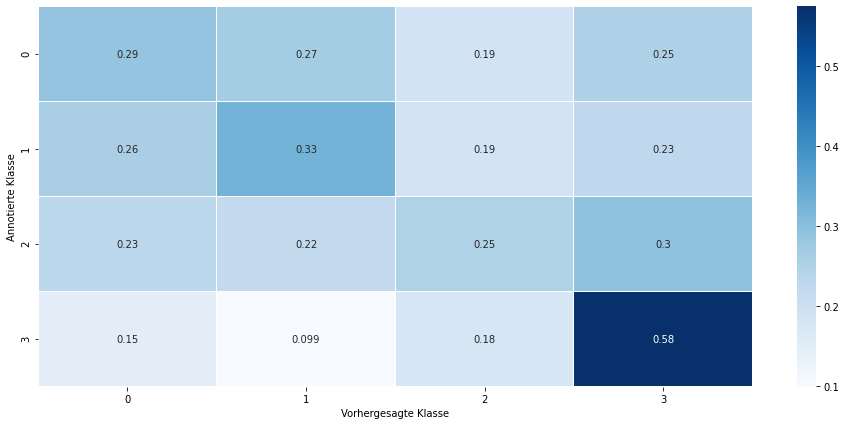

In [13]:
y_pred_test = rf.predict(X_test)
matrix = confusion_matrix(y_test_class, y_pred_test)
print(matrix)

matrix = matrix.astype("float") / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.heatmap(matrix, annot=True, annot_kws={"size":10}, cmap=plt.cm.Blues, linewidths=0.2)

plt.xlabel("Vorhergesagte Klasse")
plt.ylabel("Annotierte Klasse")
plt.show()

### 7.2 Logistische Regression
Hat das Lied grundsätzlich potential beliebt zu werden?

In [14]:
def is_popular(x):
    if x >= 66:
        return 1
    return 0

y_train_binary = y_train.apply(is_popular)
y_test_binary = y_test.apply(is_popular)

In [15]:
y_train_binary.value_counts()

0    9195
1    2379
Name: song_popularity, dtype: int64

In [16]:
X_train_sampled, y_train_binary = down_sample(X_train, y_train_binary, 2379)
y_train_binary.value_counts()

0    2379
1    2379
Name: song_popularity, dtype: int64

In [17]:
logReg = LogisticRegression()
logReg.fit(X_train_sampled, y_train_binary)

score = logReg.score(X_test, y_test_binary)
print(score)

0.5224602626123013


A priori: ROC AUC=0.500
Logistic: ROC AUC=0.578


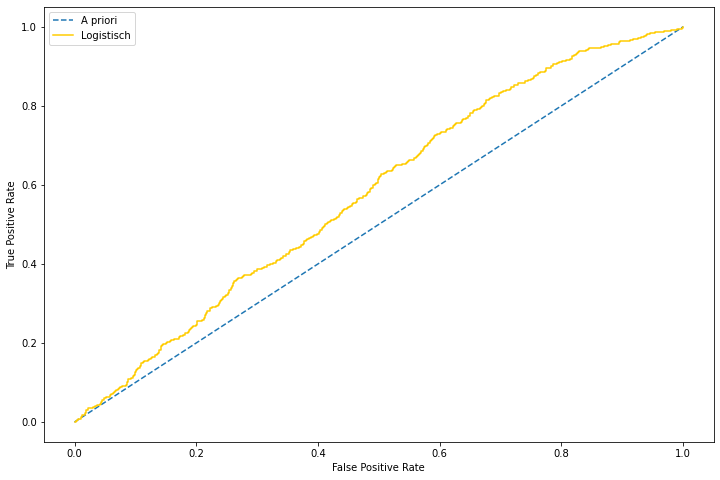

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fig, ax = plt.subplots(figsize=(12, 8))

lr_probs = logReg.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

ns_probs = [0 for _ in range(len(y_test_binary))]

ns_auc = roc_auc_score(y_test_binary, ns_probs)
lr_auc = roc_auc_score(y_test_binary, lr_probs)
# summarize scores
print("A priori: ROC AUC=%.3f" % (ns_auc))
print("Logistic: ROC AUC=%.3f" % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_binary, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_binary, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle="--", label="A priori")
plt.plot(lr_fpr, lr_tpr, label="Logistisch", color="#FFCC00")
# axis labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# show the legend
plt.legend()
# show the plot
plt.show()

## 8 Diskussion

- Auf welcher Basis wurden die 18.000 Lieder ausgewählt? Stichprobenverzerrung???
- Datensatz wahrscheinlich aus 2018. Wie wirken sich Trends evtl. aus?
- Was bedeutet Popularität?
- Der Datensatz besteht nicht nur aus Musik, sondern auch aus Reden (bsp. Rede von Martin Luther King) und weiteren nicht musikalischen 
- Wie zuverlässig sind die Features? Sind die Ergebnisse statistisch signifikant?

WICHTIGE ENTDECKUNG:
Wenn Redundanzen nicht entfernt werden, steigt der R²-Score bei der Random Forest Regression von 0.02 auf 0.38. Warum ist das so? Liegt es daran, dass 4.000 Redundanzen entfernt wurden (circa 25% des Datensatzes), diese auch zum Teil in den Testdaten 

Performance Unterschiedliche Modelle aus 5 vergleichen

### 8.1 Limitationen

- Es wurde auf bereits ermittelte Features zurükgegriffen 
- falsche Ergebnisse dort wirken sich auch unter Umständen auf die Modelle die im Rahmen dieser Ausarbeiten aufgestellt wurden aus

### 8.2 Konklusion

Weitere Forschung kann sich mit Genres und deren Beliebtheit im zeitlichen Verlauf beschäftigen, beispielsweise Rock in den 70ern?

Zusammenfassend ist der Musikgeschmack individuell und abhängig von einer Vielzahl an Faktoren. Durch die gegebenen Features lässt sich die Beliebtheit nicht bestimmen. Weitere Forschung könnte sich mit Clustering beschäftigen, wahrscheinlich auch von Spotify genutzt, um Epfehlungen zu geben, durch Clustering Gruppen finden, die ähnlichen Musikgeschmack haben.

## Quellenverzeichnis


- Alshare, Somaya; Abdullah, Malak; Quwaider, Muhannad (2022): Increasing Accuracy of Random Forest Algorithm by Decreasing Variance. In: International Conference on Information and Communication Systems (ICICS), S. 232–238.
- Bishop, Christopher M. (2016): Pattern Recognition and Machine Learning. New York, NY: Springer New York (Information Science and Statistics).
- Feige, Daniel Martin; zur Nieden, Gesa (2022): Musik und Subjektivität. Beiträge aus Musikwissenschaft, Musikphilosophie und kompositorischer Praxis. Bielefeld: transcript (Musik und Klangkultur).
- Géron, Aurélien (2019): Hands-on machine learning with Scikit-Learn and TensorFlow. Concepts, tools, and techniques to build intelligent systems. Unter Mitarbeit von Rebecca Demarest. 2. Auflage, Sebastopol (Clif.) [etc.]: O'Reilly.
- Grünewald-Schukalla, Lorenz; Jóri, Anita; Schwetter, Holger (Hg.) (2022): Musik et Marken. 1. Auflage, 2022. Wiesbaden: Springer Fachmedien Wiesbaden; Springer VS (Jahrbuch für Musikwirtschafts- und Musikkulturforschung).
- Jafari, Roy (2022): Hands-On Data Preprocessing in Python. Learn How to Effectively Prepare Data for Successful Data Analytics. Birmingham: Packt Publishing, Limited.
- Mohammed, Mohssen; Khan, Muhammad Badruddin; Bashier, Eihab Bashier Mohammed (2017): Machine learning. Algorithms and applications. Boca Raton, FL: CRC Press.